In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scripts.basic_functions import output_dir, mag_vector
from classes.ns import NeutronStar
from classes.particles import Particles
import multiprocess as mp
from scripts.conversion import find_hits

In [2]:
event = 'dASYEJGTE'
part_trajs = np.load(output_dir + event + '/' + event + '.npy')

In [3]:
indices_np = [0]

old_tag = 0
for i, part_traj in enumerate(part_trajs):
    tag = part_traj[0]
    if tag > old_tag:
        indices_np.append(i)
        old_tag += 1

In [4]:
single_particles = []
for i in np.arange(1, len(indices_np)):
    single_particles.append(part_trajs[indices_np[i - 1]: indices_np[i]])

In [5]:
M_NS, R_NS = 1, 10
NS = NeutronStar(M_NS, R_NS)
rcmax = NS.conversion_radius_max(Particles.axionmass)

In [6]:
# def find_hits(single_particle, NS):
#     hits = []
#     single_particle = single_particle[single_particle[:, 1].argsort()]

#     positions = single_particle[...,2:5]
#     distances = mag_vector(positions)
#     velocities = single_particle[...,5:]

#     if np.min(distances) < rcmax:
#         out_or_in = 1
#         for i, position in enumerate(positions):
#             conv_radius = NS.conversion_radius_est(position, Particles.axionmass)
#             if conv_radius is not None:
#                 if out_or_in*mag_vector(position) < out_or_in*conv_radius:
#                     out_or_in *= -1
#                     hits.append([position, velocities[i]])

#     return hits

In [7]:
if __name__ == '__main__':
    mp.freeze_support()
    ncores = mp.cpu_count() - 1
    pool = mp.Pool(ncores)

    all_hits = pool.starmap(find_hits, [(single_particle, NS) for single_particle in single_particles])

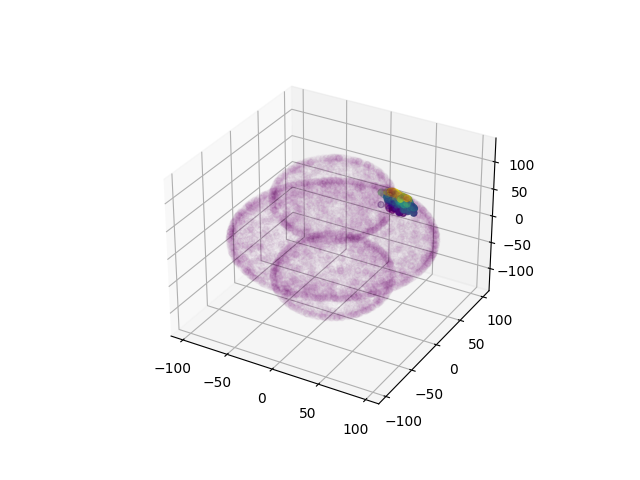

In [8]:
%matplotlib widget

positions_hits = np.array([all_hit[0][0] for all_hit in all_hits if len(all_hit) > 0])
X, Y, Z = np.array(positions_hits).T
ax = plt.axes(projection='3d')
ax.scatter3D(X, Y, Z, c = Z);

Xsurf, Ysurf, Zsurf = NS.conversion_surface_est(Particles.axionmass).T
ax.scatter3D(Xsurf, Ysurf, Zsurf, c = 'purple', alpha = 0.01);